## Alchemix Analytics Question: Bounty #15

Author Discord Username: dtradke, CCV

Date: April 19, 2021

In this report, we will explore the total number of transactions executed by the top 25 most active users for each respected address in the previous 30 days: 

•	Transmuter (0xab7a49b971afdc7ee26255038c82b4006d122086)

•	Alchemix/Vault (0xc21d353ff4ee73c572425697f4f5aad2109fe35b) 

•	4 Farm Pools (0xab8e74017a8cc7c15ffccd726603790d26d7deca) 

First, we need to import the libraries necessary and the "backend" file, which processes and formats the data for analysis and visualization.


In [1]:
import numpy as np
import urllib.request as rq
import json
from collections import Counter as c
import time
import matplotlib.pyplot as plt
import os
import pandas as pd
import operator
import datetime

import backend

Backend Imported


### Experiment 1: Transmuter

The Transmuter operates as the primary pegging mechanism for the alchemical synthetic tokens – powered by the Transmuter.sol contract. The harvested yield will directly go to the transmuter which ensures that users will see a guaranteed 1:1 exchange of alUSD and DAI. As users deposit alUSD into the Transmuter, the user receives credit in DAI proportional to the amount they currently have staked. Then, once the converted Dai is withdrawn, an equal amount of alUSD will be burned. Users have the option to send this alUSd to the transmuter which will queue it for conversion back to DAI or other stable coin of choice.

First, we load the data for transactions to the Transmuter

In [2]:
# load most active Transmuter addresses in the last 30 days
url = 'https://api.flipsidecrypto.com/api/v2/queries/aa5e9f34-d5e6-43d1-9c5d-1e2fa2e14e4d/data/latest' #30 days transmuter
dataset = backend.loadData(url)
transaction_amt, from_addresses, days = backend.getTransactions(dataset)

Below, we show graphs of the top 25 most active users of Transmuter in the last 30 days, the percentage of all traffic to Transmuter they compose, and their activity over the last 30 days.

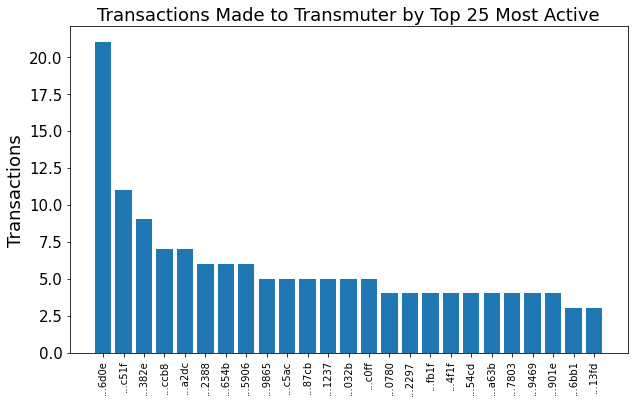

In [3]:
addresses_transmuter = backend.topAmtBar(25, transaction_amt, target_add_name='Transmuter')

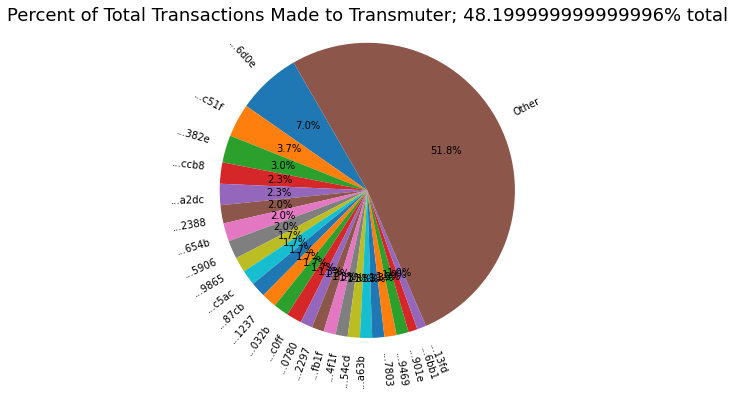

In [4]:
backend.topAmtPie(25, transaction_amt, rot_angle=120, target_add_name='Transmuter')

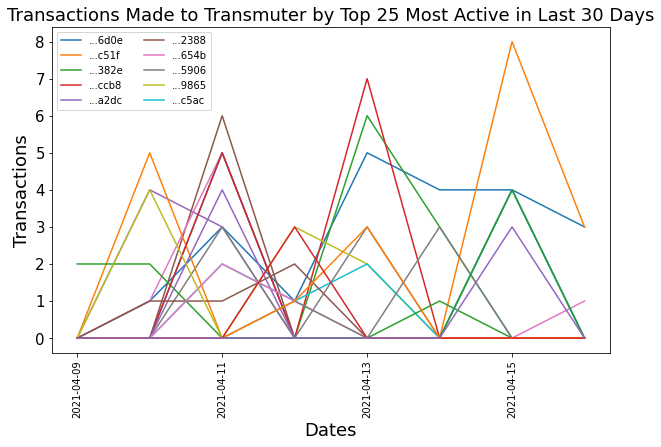

In [5]:
backend.plotTopOverTime(25, transaction_amt, from_addresses, days, target_add_name="Transmuter")

### Experiment 2: Alchemist/Vault

The Alchemist/Vault is where the deposited Dai is deployed to yearn vaults to earn yield. Alchemix vaults act as the hub to generate yield advances in the form of alUSD which is pegged to $1. The deposited DAI is then deployed to Yearn vaults to earn yield and continuously pay back the vault owner’s debt while the vault owner can choose to use the alUSD for farming or personal preference of whatever they desire.

Here our graphs demonstrate the transactions in the last 30 days completed by the top 25 most active users of the Alchemix/Vault.

In [6]:
# Now doing vault
url = 'https://api.flipsidecrypto.com/api/v2/queries/3b8abf04-bb39-4408-bc34-a1b7d8cdf56f/data/latest' #vault
dataset = backend.loadData(url)
transaction_amt, from_addresses, days = backend.getTransactions(dataset)

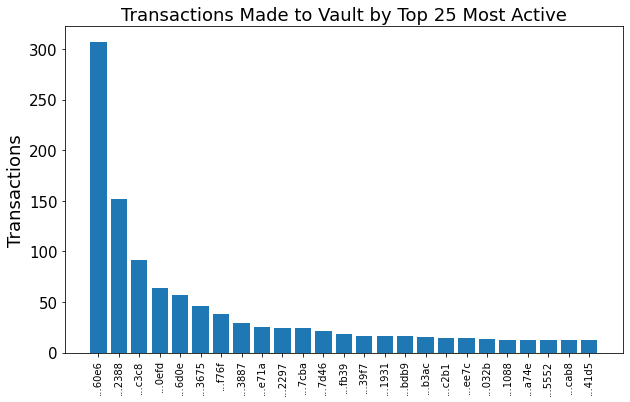

In [7]:
addresses_vault = backend.topAmtBar(25, transaction_amt, target_add_name='Vault')

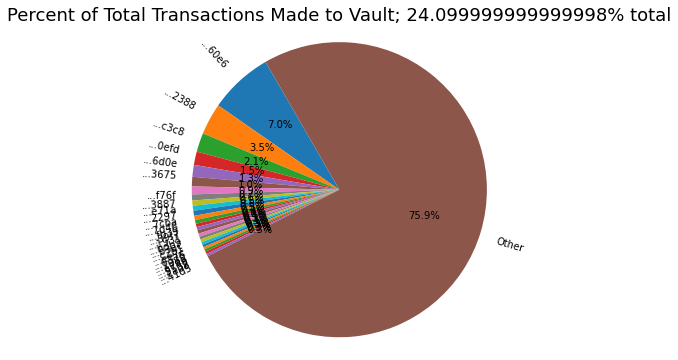

In [8]:
backend.topAmtPie(25, transaction_amt, rot_angle=120, target_add_name='Vault')

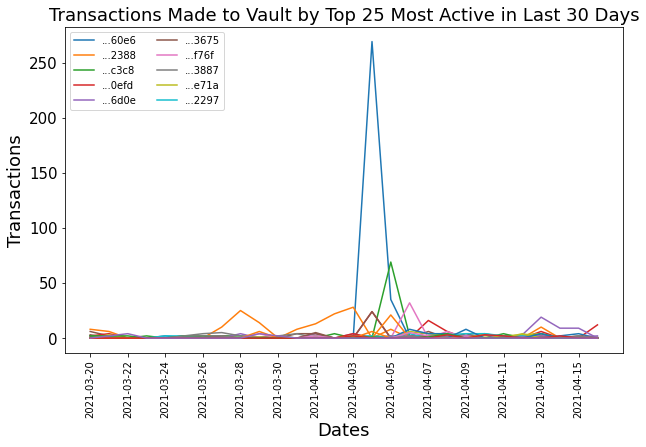

In [9]:
backend.plotTopOverTime(25, transaction_amt, from_addresses, days, target_add_name="Vault")

### Experiment 3: Farm Pools

Currently, Alchemix possesses 4 different farming pools: 

•	ALCX Pool

•	alUSD Pool

•	ETH-ALCX SushiSwap Pool

•	alUSD3Crv Pool

Here our graphs demonstrate the transactions in the last 30 days completed by the top 25 most active users of the 4 farm pools.


In [10]:
# Now doing pools
url = 'https://api.flipsidecrypto.com/api/v2/queries/9bf5d60e-66f7-4428-a725-5b539be0ff26/data/latest' #30 days Pools (staking)
dataset = backend.loadData(url)
transaction_amt, from_addresses, days = backend.getTransactions(dataset)

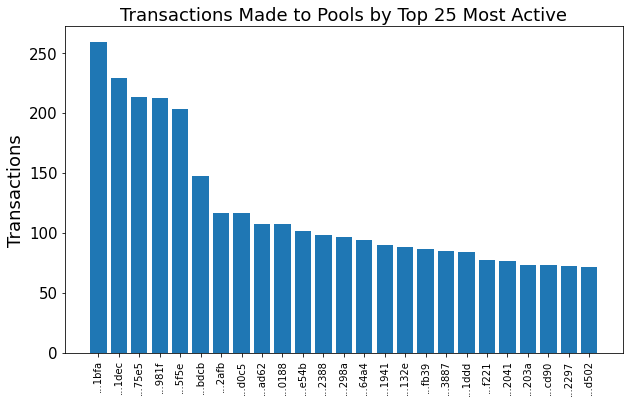

In [11]:
addresses_pools = backend.topAmtBar(25, transaction_amt, target_add_name='Pools')

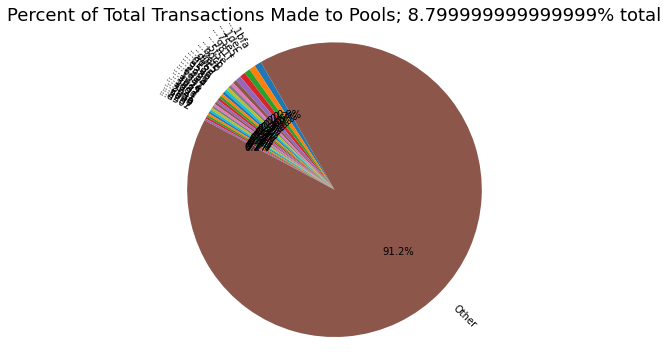

In [12]:
backend.topAmtPie(25, transaction_amt, rot_angle=120, target_add_name='Pools')

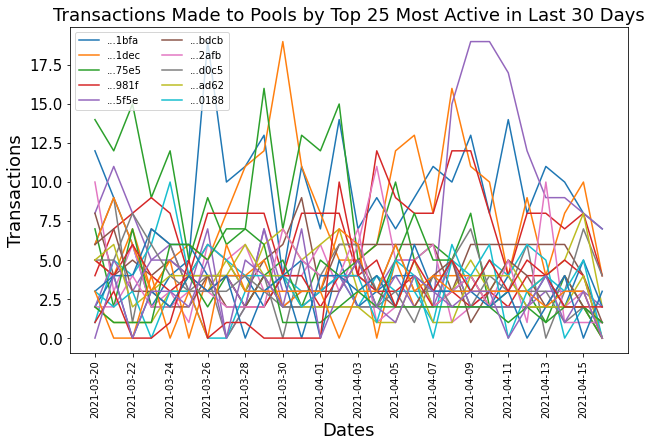

In [13]:
backend.plotTopOverTime(25, transaction_amt, from_addresses, days, target_add_name="Pools")

Analyzing the top 25 most active users of the following three pools in the last 30 days: Transmuter, Alchemix/Vault, and 4 farming pools, we discovered that selective addresses were present in the top 25 most active users for all three collective pools, just two of them, or just one.

In [14]:
backend.percSameAddresses(addresses_transmuter, addresses_vault, addresses_pools)

Addresses top 25 in all 3:  2
Addresses top 25 in all 2:  4
Addresses top 25 in all 1:  61


### Conclusion

By analyzing the most active users to Transmuter, Alchemist/Vault, and the 4 farm pools, we are able to uncover patterns in behaviour which show how ALCX users are using core functions. In partucular, we notice that transaction behaviour over time is much more consistent among the top 25 most active for transactions to Transmuter and the 4 farm pools. This is mostly due to a single user making a large number of transactions with Alchemist/Vault on April 4, 2021, which overshadows the other 24 most active. The top 25 most active users with Transmuter accounted for over 48% of all traffic to the Transmuter, whereas they only accounted for 24% and 8.8% towards Alchemist/Vault and the 4 farm pools respectively. Finally, while we note that some users are consistently within the top 25 most active, the vast majority of users using these three core functions are different. This result suggests the diversity in how people tend to behave with their Alchemix.